# Import packages

In [1]:
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.linalg import orth
import time

from sca.models import SCA, WeightedPCA
from sca.util import get_sample_weights, get_accuracy

/opt/anaconda3/envs/ssa_sklearn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# %load_ext autoreload
# %autoreload 2

# Simulate data
Data is simulated from sparsely occurring latents. This is the same simulated data as in the Example_1pop notebook

In [3]:
#Function that creates a sine wave for a given amount of time (T),
#where the number of cycles (c) occurs during that time
def create_sine(T,c):
    tau=T/(2*np.pi)/c
    return np.sin(np.arange(0,T)/tau)

#### Generate the simulated data X0, which is size [Time x Num_neurons]

In [4]:
np.random.seed(0) #To get the same simulated data

T=1200 #Time
N_neurons=50 #Number of neurons
R_sim=7 #Number of dimensions in lowD representations

#Orthogonal matrix that projects low dimensional space to full neural space
V_tmp=orth(npr.randn(R_sim,N_neurons).T).T 

#Create low dimensional space
Z=np.zeros([T,R_sim])
for i in range(7):
    Z[150*i:150*i+300,i]=create_sine(300,i+1)

#Create high-dimensional neural activity    
b=npr.randn(N_neurons) #Offset of neurons
X0=Z@V_tmp[:R_sim,:]+b #Project into high-dimensional space and add offset
X0=X0+.1*npr.randn(X0.shape[0],X0.shape[1]) #Add noise

# Preprocess data (optional)

We have found that the method usually works better when zero-centering the data.

In this specific example, if you don't zero-center the data, it will take ~10000 iterations to converge to the ground truth, rather than ~2000.

In [6]:
# X = np.copy(X0)
X=np.copy(X0-np.mean(X0,axis=0)[None,:])

# Set required model parameters

In [7]:
#Number of dimensions in the low-D model you're fitting
n_components=8

# Fit SCA Model for different sparsity hyperparameters

Define sparsity hyperparameters to test

In [8]:
#List of sparsity hyperparameters to run the model for
lam_sparse_list=list(np.logspace(-4,1,15)) 

#Lists to collect reults
r2_scores=[]
reconstruction_losses=[]

Fit model at those sparsity hyperparameters. <br>
Note that in this notebook, we fit the models with all other optional parameters unspecified (as the default) and without sample weighting

In [9]:
for lam_sparse in lam_sparse_list: #Loop over lam_sparse values defined in previous cell
    
    #Declare SCA model without all the optional parameters
    sca=SCA(n_components=n_components, lam_sparse=lam_sparse)

    #Fit the model and get the low dimensional representation
    sca_latent=sca.fit_transform(X=X)
    
    #Add r2 and reconstruction losses for this lam_sparse to their lists
    r2_scores.append(sca.r2_score)
    reconstruction_losses.append(sca.reconstruction_loss)

Using lam_orthog=  88.06139559390984
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 850.92it/s]


Using lam_orthog=  88.00813214458157
Using device cpu


100%|██████████| 3000/3000 [00:04<00:00, 621.46it/s]


Using lam_orthog=  88.0164314434398
Using device cpu


100%|██████████| 3000/3000 [00:04<00:00, 601.84it/s]


Using lam_orthog=  87.99555275787247
Using device cpu


100%|██████████| 3000/3000 [00:04<00:00, 688.78it/s]


Using lam_orthog=  87.98727359567049
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 824.21it/s]


Using lam_orthog=  88.02830472965023
Using device cpu


100%|██████████| 3000/3000 [00:04<00:00, 738.98it/s]


Using lam_orthog=  88.00586980824646
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 842.08it/s]


Using lam_orthog=  88.02472586355955
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 778.72it/s]


Using lam_orthog=  87.9711714307063
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 825.79it/s]


Using lam_orthog=  88.04901340432659
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 898.49it/s]


Using lam_orthog=  87.9950626793225
Using device cpu


100%|██████████| 3000/3000 [00:04<00:00, 702.18it/s]


Using lam_orthog=  87.98286653015698
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 849.79it/s]


Using lam_orthog=  87.96452632568366
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 857.17it/s]


Using lam_orthog=  88.01786073924093
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 834.23it/s]


Using lam_orthog=  88.02995417128182
Using device cpu


100%|██████████| 3000/3000 [00:03<00:00, 866.48it/s]


# Plot the reconstruction loss as a function of lam_sparse
We also plot the reconstruction loss at the default lam_sparse value for reference (in red), to show that lam_sparse can often be increased above that default without a meaningful change in reconstruction loss

Text(0, 0.5, 'Reconstruction Loss')

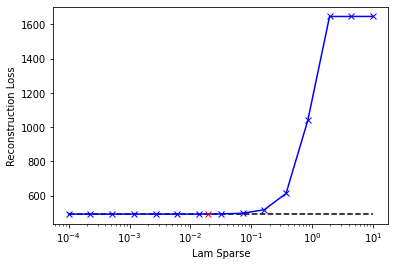

In [10]:
plt.figure()
plt.plot(lam_sparse_list,np.min(reconstruction_losses)*np.ones(len(lam_sparse_list)),'k--') #Plot the minimum value as a dashed black horizontal line
plt.plot(lam_sparse_list,reconstruction_losses,'x-',color='blue') #Plot all the values from the above loop over models
plt.plot(0.019669574184939944,492.9108160024853,'x',color='red') #Plot the default sparsity value for reference (this is taken from the Example_1pop notebook)
plt.xscale('log')
plt.xlabel('Lam Sparse')
plt.ylabel('Reconstruction Loss')